<a href="https://colab.research.google.com/github/pondbaahh/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'วัชราภรณ์ นามมุงคุณ'
ID = '6230205357'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:19


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.701053,-6.716733,0.403364,8.234690,-8.066837,-2.969272,-1.286681,-2.798265,-9.434770,-6.585169,7.514024,-5.458482,-9.662730,0.537632,1.835089,-3.167337,9.810909,-6.315188,9.017869,-2.029059,5.476176,0.715766,-7.416330,-7.806251,9.232618,8.409526,6.286528,-2.080765,-1.946039,5.766268,-13.433466,30.831342
1,4.841694,9.280394,5.654291,-3.599408,-5.216423,-4.875522,11.564998,2.582919,7.268002,-9.161972,6.814420,-10.976289,-9.452713,-8.650234,-5.160244,-2.122332,11.510111,10.001235,1.100650,4.305707,-8.897800,5.286709,-8.570399,-4.133147,8.891458,-3.532263,6.349222,-0.239454,3.451313,4.345222,18.560788,23.726110
2,-0.188645,2.192432,-3.740707,-4.352023,6.094169,-9.596532,-4.308490,-6.889333,-5.077756,1.258608,-6.810207,-2.277972,2.577195,-2.932891,-2.938483,1.938843,6.440925,-2.161827,-10.726694,8.769474,6.872000,-4.019564,4.486527,-1.790280,3.444224,-7.158424,-7.046810,7.500269,8.608146,-6.347430,4.384863,-29.737152
3,1.070325,-4.596020,-6.293644,11.475116,-2.808209,1.518051,-7.053902,4.258510,3.218390,4.061030,6.367516,6.645035,-1.217043,8.827455,-11.346177,5.971061,6.831416,1.345803,3.357612,7.763393,-1.969457,-1.002429,-1.091993,4.763577,-10.140268,-7.034817,-7.012771,7.431734,-6.320076,3.040692,-9.192040,17.203462
4,-6.795409,-3.422134,-7.935199,5.704634,6.601110,-10.263675,9.217757,6.769842,4.182693,3.637057,-7.968196,-1.315642,9.280129,-2.030549,-8.638449,-5.767849,0.435129,-8.158601,2.004322,-8.079486,-2.890066,-7.521663,3.418707,-4.440289,3.099145,3.605520,-1.421144,-10.701892,10.955527,2.214531,-6.844268,13.072654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.228056,6.839652,5.688027,5.059781,-9.822777,8.527898,9.581539,-5.941708,4.019455,-1.991152,-1.039847,3.131037,8.287049,6.791250,8.476287,3.919213,-7.350831,6.703071,-4.241985,0.331566,8.358831,-0.458548,7.436097,9.914771,8.944351,-4.316166,-5.774025,-7.241011,-0.100094,7.654443,13.679304,40.272216
9996,3.874110,-3.381571,-5.827415,10.433695,2.009930,4.842115,-6.144390,4.278543,3.174105,6.071067,8.091267,6.234274,-1.376929,8.841083,-8.938951,6.276817,6.379705,0.849872,3.258522,10.383427,-2.332721,-0.398124,0.094108,4.194007,-8.157674,-7.813417,-6.653850,5.263005,-2.912163,1.642549,-6.763143,10.212746
9997,2.723442,-8.816045,7.226316,9.642599,-3.002382,1.185427,-0.529747,6.702167,-7.207471,10.747197,7.174096,0.069767,2.317635,6.258422,-0.432146,-3.708092,-7.267421,2.333919,2.544128,0.902972,7.557652,-5.001459,-4.342318,-3.762169,-4.423610,4.586694,-7.123318,2.317072,5.545957,-10.469733,-17.632089,-50.348664
9998,-6.870815,-2.104393,-8.007465,9.810235,7.760187,-8.250139,8.150071,7.945936,6.862951,4.200982,-7.341678,-2.715077,11.188661,-2.081114,-7.773971,-7.525738,-2.642424,-10.417773,4.039373,-7.889138,-1.538853,-6.396142,4.206817,-5.607508,3.995322,3.321244,-5.785854,-9.029805,10.328162,2.925788,-4.208785,16.628938


1. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ 

### clustering

In [6]:
Data.shape

(10000, 32)

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3,random_state=2021)

In [9]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[ -1.08780549,  -2.29607055,  -0.98298195,   0.14346779,
          0.5527234 ,   0.07089763,  -1.70616748,  -1.73697949,
         -3.58114554,   4.34622829,   0.79279007,   1.93817897,
          3.79825024,   3.8128724 ,  -1.20532033,   2.60390476,
          3.16344582,   2.07233784,  -5.92159968,   1.22279113,
         -0.44676379,  -1.13328253,  -1.31608209,   0.50623549,
         -1.43159518,  -1.17396953,  -0.59336161,  -1.99722839,
          1.55145501,  -7.41109493,  -4.59214109, -35.05547467],
       [  1.27481937,   2.71835787,  -2.1760495 ,   1.51074048,
          1.34231573,  -1.63041974,   2.69802951,   2.10630659,
          3.99868411,  -2.29097958,   0.67783007,  -0.42214799,
         -1.31571444,  -1.15031994,  -3.9202539 ,  -0.43477137,
         -0.07970473,   1.7704335 ,   1.49111206,  -1.84092775,
          1.06085039,  -0.99374174,  -0.44939261,  -2.28596322,
          3.93207715,  -3.04221617,   0.55713411,   2.03299143,
          1.33987907,   2.3609091 ,   5

In [11]:
y = kmeans.predict(Data)
y

array([2, 1, 0, ..., 0, 1, 0], dtype=int32)

In [12]:
from sklearn.decomposition import PCA

In [13]:
from matplotlib import pyplot as plt

In [14]:
pca = PCA(n_components=2)

In [15]:
new_pca = pca.fit_transform(Data)

In [16]:
new_pca.shape

(10000, 2)

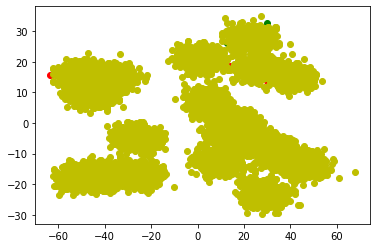

In [17]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

ในกรณีที่เราใช้ Default

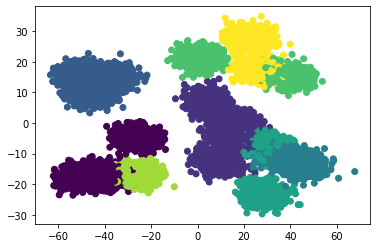

In [18]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

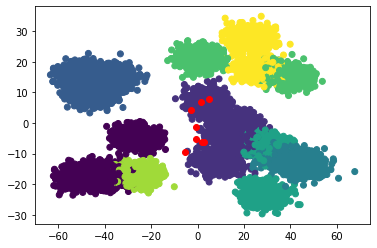

In [19]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

Elbow method

In [20]:
kmeans.inertia_

6439989.808714021

SSE (Sum of Squared Errors)

In [21]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [22]:
SSE

[21350325.789858438,
 12393046.099239781,
 10776718.895710021,
 9738911.172012035,
 8879612.274629781,
 8063629.856036617,
 7364694.483401365,
 6439989.808714021]

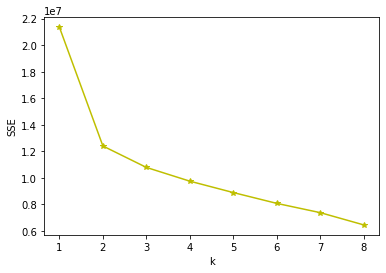

In [23]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'*-y')
plt.xlabel('k')
plt.ylabel('SSE');

In [24]:
from sklearn import metrics

In [25]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

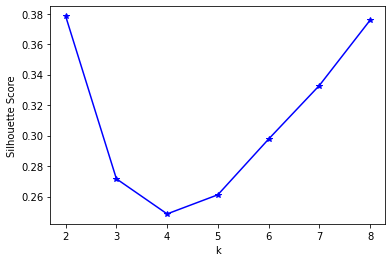

In [26]:
plt.plot([2,3,4,5,6,7,8],SilH,'*-b')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

2. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

ตรวจสอบว่า ระหว่าง coluns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [27]:
import numpy as np

In [28]:
corr = np.corrcoef(Data.to_numpy().T)

In [29]:
corr.shape

(32, 32)

In [30]:
corr

array([[ 1.        ,  0.07765901,  0.07928259, ...,  0.20383151,
         0.07765901,  0.20383151],
       [ 0.07765901,  1.        ,  0.15362148, ...,  0.06078046,
         1.        ,  0.06078046],
       [ 0.07928259,  0.15362148,  1.        , ..., -0.11973798,
         0.15362148, -0.11973798],
       ...,
       [ 0.20383151,  0.06078046, -0.11973798, ...,  1.        ,
         0.06078046,  1.        ],
       [ 0.07765901,  1.        ,  0.15362148, ...,  0.06078046,
         1.        ,  0.06078046],
       [ 0.20383151,  0.06078046, -0.11973798, ...,  1.        ,
         0.06078046,  1.        ]])

In [31]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0
